<a href="https://colab.research.google.com/github/hoangvypy/DataCamp-Projects/blob/main/Copy_of_Introduction_to_Spark_with_sparklyr_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This notebook includes some notes and projects from my Datacamp course. In order to practicing along with the instruction, I created a local cluster on Colab notebook (referenced from Github, copilot, Genimi, and ChatGPT), and linked provided files from Google Drive.

1. **Install rpy2 to allow R scripting, and required R packages**

In [3]:
# Install rpy2: Use pip to install the rpy2 library, which allows Python to interface with R.
%pip install rpy2==3.5.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.7/201.7 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for rpy2: filename=rpy2-3.5.1-cp310-cp310-linux_x86_64.whl size=314948 sha256=2cacf1dd053f46ee8eec31bccb79e0a61b4e39f456a38306651c8ab05b23105a
  Stored in directory: /root/.cache/pip/wheels/73/a6/ff/4e75dd1ce1cfa2b9a670cbccf6a1e41c553199e9b25f05d953
Successfully built rpy2
  Attempting uninstall: rpy2
    Found existing installation: rpy2 3.4.2
    Uninstalling rpy2-3.4.2:
      Successfully uninstalled rpy2-3.4.2


In [4]:
# Load R magic: Load the R magic extension to enable running R code directly within Colab cells.
%load_ext rpy2.ipython

In [34]:
# Install and load the stringr package
!pip install stringr # Install the stringr package


ERROR: Could not find a version that satisfies the requirement stringr (from versions: none)
ERROR: No matching distribution found for stringr


NameError: name 'library' is not defined

In [5]:
# Install the required packages in R
!apt-get install -y r-cran-rjava
!R -e "install.packages(c('sparklyr', 'dplyr'))"


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre x11-utils
Suggested packages:
  mesa-utils
The following NEW packages will be installed:
  default-jre default-jre-headless fonts-dejavu-core fonts-dejavu-extra libatk-wrapper-java
  libatk-wrapper-java-jni libfontenc1 libxkbfile1 libxtst6 libxxf86dga1 openjdk-11-jre r-cran-rjava
  x11-utils
0 upgraded, 13 newly installed, 0 to remove and 49 not upgraded.
Need to get 4,438 kB of archives.
After this operation, 14.0 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/main amd64 default-jre-headless amd64 2:1.11-72build2 [3,042 B]
Get:2 http://archive.ubuntu.com/ubuntu jammy/main amd64 libxtst6 amd64 2:1.2.3-1build4 [13.4 kB]
Get:

2. **Install Spark**

In [9]:
# Install Java (version 8 for Spark compatibility)
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# Download Spark with Hadoop and extract it
!wget -q https://archive.apache.org/dist/spark/spark-3.3.0/spark-3.3.0-bin-hadoop3.tgz
!tar xf spark-3.3.0-bin-hadoop3.tgz

# Install findspark to link Python with Spark
!pip install -q findspark




In [10]:
# List the contents of the Python directory inside Spark to verify py4j
!ls /content/spark-3.3.0-bin-hadoop3/python/lib



py4j-0.10.9.5-src.zip  PY4J_LICENSE.txt  pyspark.zip


Making sure `py4j-0.10.9.5-src.zip` is in directory

3. **Set up Environment Variables**

In [11]:
import os

# Set environment variables for Spark and Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.0-bin-hadoop3"
os.environ["PATH"] = os.environ["SPARK_HOME"] + "/bin:" + os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]

# Initialize findspark
import findspark
findspark.init()



4. **Load Sparklyr in R**

In [12]:
%%R
Sys.setenv(SPARK_HOME = "/content/spark-3.3.0-bin-hadoop3")
Sys.setenv(JAVA_HOME = "/usr/lib/jvm/java-8-openjdk-amd64")

library(sparklyr)
library(dplyr)

# Connect to Spark
sc <- spark_connect(master = "local")

Attaching package: ‘sparklyr’



    filter


Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




5. **Connect files from google drive**

In [1]:
# Load the Drive helper and mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
%%R
path = '/content/drive/MyDrive/'
track_metadata <- readRDS(paste0(path,'track_metadata.rds'))

In [19]:
%%R
# Load dplyr
library(dplyr)

# Explore track_metadata structure
str(track_metadata)

tibble [1,000 × 11] (S3: tbl_df/tbl/data.frame)
 $ track_id          : chr [1:1000] "TRDVOZX128F93283A3" "TRDPMEU12903CC5434" "TRJQDNJ128F426E8CE" "TRRRGCS128F4280BB6" ...
 $ title             : chr [1:1000] "Jersey Belle Blues" "Get Yourself Together" "Jersey Bull Blues" "High Fever Blues" ...
 $ song_id           : chr [1:1000] "SOKMEHX12AB0180877" "SOFCPUM12AB018A4EB" "SOKDFLC12A8C1354AE" "SONQUOG12A8C13C76F" ...
 $ release           : chr [1:1000] "Backwater Blues" "Rambler's Blues" "Complete Recordings_ CD E" "The Panama Limited" ...
 $ artist_id         : chr [1:1000] "ARDNQ0R1187B9BA1EF" "ARDNQ0R1187B9BA1EF" "ARTDUXM1187B9899ED" "ARNEL2O1187FB4421A" ...
 $ artist_mbid       : chr [1:1000] "dbfd61ef-fce1-4803-9f18-7bfdd3996508" "dbfd61ef-fce1-4803-9f18-7bfdd3996508" "c71b4f57-29da-4bf2-bccb-9dc81cd2d905" "882af819-887e-4691-a4af-b14613058942" ...
 $ artist_name       : chr [1:1000] "Lonnie Johnson" "Lonnie Johnson" "Charley Patton" "Bukka White" ...
 $ duration          : num [1:

In [20]:
%%R
# Connect to Spark
sc <- spark_connect(master = "local")

# Copy track_metadata to Spark
track_metadata_tbl <- copy_to(sc, track_metadata, overwrite = TRUE)


# List the data frames available in Spark
src_tbls(sc)

# Disconnect from Spark
#spark_disconnect(sc = spark_conn)

[1] "timbre"         "track_metadata"


In [21]:
%%R
# Print 5 rows, all columns
print(track_metadata_tbl, n = 5, width =Inf)

# Examine structure of tibble
str(track_metadata_tbl)

# Examine structure of data
glimpse(track_metadata_tbl)

# Source:   table<`track_metadata`> [?? x 11]
# Database: spark_connection
  track_id           title                 song_id           
  <chr>              <chr>                 <chr>             
1 TRDVOZX128F93283A3 Jersey Belle Blues    SOKMEHX12AB0180877
2 TRDPMEU12903CC5434 Get Yourself Together SOFCPUM12AB018A4EB
3 TRJQDNJ128F426E8CE Jersey Bull Blues     SOKDFLC12A8C1354AE
4 TRRRGCS128F4280BB6 High Fever Blues      SONQUOG12A8C13C76F
5 TRISTAT12903CFCBA1 Safety Mama           SODFTCC12AC95F0214
  release                   artist_id         
  <chr>                     <chr>             
1 Backwater Blues           ARDNQ0R1187B9BA1EF
2 Rambler's Blues           ARDNQ0R1187B9BA1EF
3 Complete Recordings_ CD E ARTDUXM1187B9899ED
4 The Panama Limited        ARNEL2O1187FB4421A
5 The Blues Collection      ARYYCVC1187B9A8510
  artist_mbid                          artist_name    duration
  <chr>                                <chr>             <dbl>
1 dbfd61ef-fce1-4803-9f18-7bfdd39965

##Selecting columns##

In [22]:
%%R
# track_metadata_tbl has been pre-defined
track_metadata_tbl

# Manipulate the track metadata
track_metadata_tbl %>%
  # Select columns
  select(artist_name, release, title, year)

# Try to select columns using [ ]
tryCatch({
    # Selection code here
    track_metadata_tbl[, c("artist_name", "release", "title", "year")]
  },
  error = print
)

<simpleError in `[.tbl_spark`(track_metadata_tbl, , c("artist_name", "release",     "title", "year")): unused argument (c("artist_name", "release", "title", "year"))>


# Filtering rows

In [23]:
%%R
# track_metadata_tbl has been pre-defined
glimpse(track_metadata_tbl)

# Manipulate the track metadata
track_metadata_tbl %>%
  # Select columns
  select(artist_name, release, title, year) %>%
  # Filter rows
  filter(year >= 1960, year < 1970)

Rows: ??
Columns: 11
Database: spark_connection
$ track_id           <chr> "TRDVOZX128F93283A3", "TRDPMEU12903CC5434", "TRJQDN…
$ title              <chr> "Jersey Belle Blues", "Get Yourself Together", "Jer…
$ song_id            <chr> "SOKMEHX12AB0180877", "SOFCPUM12AB018A4EB", "SOKDFL…
$ release            <chr> "Backwater Blues", "Rambler's Blues", "Complete Rec…
$ artist_id          <chr> "ARDNQ0R1187B9BA1EF", "ARDNQ0R1187B9BA1EF", "ARTDUX…
$ artist_mbid        <chr> "dbfd61ef-fce1-4803-9f18-7bfdd3996508", "dbfd61ef-f…
$ artist_name        <chr> "Lonnie Johnson", "Lonnie Johnson", "Charley Patton…
$ duration           <dbl> 177.9195, 190.4061, 192.6265, 174.1057, 191.7383, 1…
$ artist_familiarity <dbl> 0.5589263, 0.5589322, 0.5743001, 0.5724709, 0.63752…
$ artist_hotttnesss  <dbl> 0.4048271, 0.4048271, 0.3755936, 0.4244876, 0.40479…
$ year               <int> 1940, 1940, 1934, 1940, 1931, 1939, 1936, 1940, 193…
# Source:   SQL [?? x 4]
# Database: spark_connection
   artist_name    

4. Chapter 4: Case Study: Learning to be a Machine: Running Machine Learning Models on Spark
# Machine learning functions
In the last chapter, you saw some of the feature transformation functionality of Spark MLlib. If that library were a meal, the feature transformations would be a starter; the main course is a sumptuous selection of machine learning modeling functions! These functions all have names beginning with ml_, and have a similar signature. They take several arguments, including a tibble, a formula specifying the relationship between variables, a string naming the features, a string containing the labels and more.

Supported machine learning functions include linear regression and its variants, tree-based models (ml_decision_tree_classifier()), and a few others. You can see the list of all the machine learning functions using ls().

ls("package:sparklyr", pattern = "^ml")
What arguments do all the machine learning model functions take?

In [15]:
%%R
# parquet_dir has been pre-defined
# parquet_dir <- "/usr/local/share/datasets/timbre_parquet"
path = '/content/drive/MyDrive/'
parquet_dir <- paste0(path,"timbre_parquet/timbre_parquet")

# List the files in the parquet dir
filenames <- dir(parquet_dir, full.names =TRUE)

# Show the filenames and their sizes
data_frame(
  filename = basename(filenames),
  size_bytes = file.size(filenames)
)

# Import the data into Spark
timbre_tbl <- spark_read_parquet(sc, "timbre", parquet_dir)

In [16]:
%%R
# track_timbre_tbl has been pre-defined
glimpse(timbre_tbl)

Rows: ??
Columns: 13
Database: spark_connection
$ track_id       <chr> "TRDPMEU12903CC5434", "TRDVOZX128F93283A3", "TRDOAKS128…
$ timbre_means1  <dbl> 37.34080, 33.26405, 37.87293, 35.70651, 29.10453, 37.40…
$ timbre_means2  <dbl> -70.24654, -136.76969, -17.81619, -142.37477, -134.9177…
$ timbre_means3  <dbl> 39.428858, 54.503290, 54.804798, 72.635894, 52.171353, …
$ timbre_means4  <dbl> 12.6726046, 3.5944586, 3.6086709, -2.2336725, -0.671489…
$ timbre_means5  <dbl> -23.8911017, -4.3616010, -17.6013387, -48.2585588, -32.…
$ timbre_means6  <dbl> 24.034231, 23.981073, 23.116284, 18.523935, 12.665335, …
$ timbre_means7  <dbl> -7.7350931, -23.9888659, -7.6270706, -29.1449510, -0.49…
$ timbre_means8  <dbl> -4.5633195, 8.4730116, 3.9641605, 1.7380961, 16.0343886…
$ timbre_means9  <dbl> 13.4756777, -8.5361540, 2.3813917, 19.8833431, -35.0272…
$ timbre_means10 <dbl> 2.4620544, 3.4940116, 1.2209599, 13.1110333, -5.6356292…
$ timbre_means11 <dbl> 1.06854298, -0.96005464, -0.13766292, 3.10174706,

# Come together


In [31]:
%%R

# track_metadata_tbl, timbre_tbl pre-defined
track_metadata_tbl
timbre_tbl

track_data_tbl <- track_metadata_tbl %>%
                          # Inner join to timbre_tbl
                          inner_join(timbre_tbl, by = "track_id") %>%
                          # Convert year to numeric
                          mutate(year = as.numeric(year))

str(track_data_tbl)

List of 6
 $ src               :List of 1
  ..$ con:List of 13
  .. ..$ master      : chr "local[2]"
  .. ..$ method      : chr "shell"
  .. ..$ app_name    : chr "sparklyr"
  .. ..$ config      :List of 7
  .. .. ..$ spark.env.SPARK_LOCAL_IP.local           : chr "127.0.0.1"
  .. .. ..$ sparklyr.connect.csv.embedded            : chr "^1.*"
  .. .. ..$ spark.sql.legacy.utcTimestampFunc.enabled: logi TRUE
  .. .. ..$ sparklyr.connect.cores.local             : int 2
  .. .. ..$ spark.sql.shuffle.partitions.local       : int 2
  .. .. ..$ sparklyr.shell.name                      : chr "sparklyr"
  .. .. ..$ sparklyr.shell.driver-memory             : chr "2g"
  .. .. ..- attr(*, "config")= chr "default"
  .. .. ..- attr(*, "file")= chr "/usr/local/lib/R/site-library/sparklyr/conf/config-template.yml"
  .. .. ..- attr(*, "class")= chr "config"
  .. ..$ state       :<environment: 0x5604f3852830> 
  .. ..$ extensions  :List of 6
  .. .. ..$ jars              : chr(0) 
  .. .. ..$ packages    

# Partitioning data with a group effect


In [32]:
%%R

# track_data_tbl has been pre-defined
track_data_tbl

training_testing_artist_ids <- track_data_tbl %>%
  # Select the artist ID
  select(artist_id) %>%
  # Get distinct rows
  distinct() %>%
  # Partition into training/testing sets
  sdf_random_split(training = .7, testing=0.3)

track_data_to_model_tbl <- track_data_tbl %>%
  # Inner join to training partition
  inner_join(training_testing_artist_ids$training, by = "artist_id")

track_data_to_predict_tbl <- track_data_tbl %>%
  # Inner join to testing partition
  inner_join(training_testing_artist_ids$testing, by = "artist_id")

# Gradient boosted trees: modeling



In [35]:
%%R

library(stringr)

# track_data_to_model_tbl has been pre-defined
track_data_to_model_tbl

feature_colnames <- track_data_to_model_tbl %>%
  # Get the column names
  colnames() %>%
  # Limit to the timbre columns
  str_subset(fixed("timbre"))

feature_colnames

# Create the formula for the model
year_formula <- reformulate(termlabels= feature_colnames,
                            response = "year")

gradient_boosted_trees_model <- track_data_to_model_tbl %>%
  # Run the gradient boosted trees model
  ml_gradient_boosted_trees(year_formula)

# Gradient boosted trees: prediction



In [36]:
%%R
# Training, testing sets & model are pre-defined
track_data_to_model_tbl
track_data_to_predict_tbl
gradient_boosted_trees_model

# Predict the responses for the testing data
predicted <- ml_predict(
      gradient_boosted_trees_model,
      track_data_to_predict_tbl) %>% pull(prediction)

# Prepare the data for comparing predicted responses with actual responses
responses <- track_data_to_predict_tbl %>%
  # Select the response column
  select(year) %>%
  # Collect the results
  collect() %>%
  # Add in the predictions
  mutate(predicted)

In [47]:
%%R
responses

# A tibble: 29 × 2
    year predicted
   <dbl>     <dbl>
 1  1945     1949.
 2  1949     1947.
 3  1937     1939.
 4  1939     1938.
 5  1949     1944.
 6  1949     1944.
 7  1947     1940.
 8  1938     1944.
 9  1935     1939.
10  1960     1946.
# ℹ 19 more rows
# ℹ Use `print(n = ...)` to see more rows


# Gradient boosted trees: visualization




In [45]:
%%R

library(ggplot2)

# responses has been pre-defined
responses

# Draw a scatterplot of predicted vs. actual
ggplot(responses, aes(actual, predicted)) +
  # Add the points
  geom_point(alpha=0.1) +
  # Add a line at actual = predicted
  geom_abline(intercept=0, slope=1)

residuals <- responses %>%
  # Transmute response data to residuals
  transmute(residual= predicted - actual)

# Draw a density plot of residuals
ggplot(residuals, aes(residual)) +
    # Add a density curve
    geom_density() +
    # Add a vertical line through zero
    geom_vline(xintercept = 0)

Error in `transmute()`:
ℹ In argument: `residual = predicted - actual`.
Caused by error:
! object 'actual' not found
Run `rlang::last_trace()` to see where the error occurred.

Error in transmute(., residual = predicted - actual) : 
Caused by error:
! object 'actual' not found


RInterpreterError: Failed to parse and evaluate line '\nlibrary(ggplot2)\n\n# responses has been pre-defined\nresponses\n\n# Draw a scatterplot of predicted vs. actual\nggplot(responses, aes(actual, predicted)) +\n  # Add the points\n  geom_point(alpha=0.1) +\n  # Add a line at actual = predicted\n  geom_abline(intercept=0, slope=1)\n\nresiduals <- responses %>%\n  # Transmute response data to residuals\n  transmute(residual= predicted - actual)\n\n# Draw a density plot of residuals\nggplot(residuals, aes(residual)) +\n    # Add a density curve\n    geom_density() +\n    # Add a vertical line through zero\n    geom_vline(xintercept = 0)\n'.
R error message: "Error in transmute(., residual = predicted - actual) : \nCaused by error:\n! object 'actual' not found"

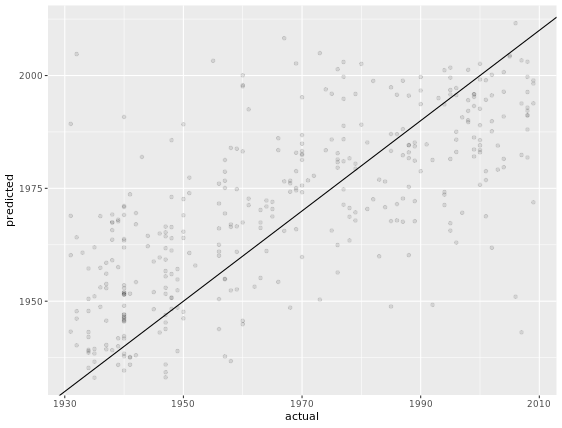

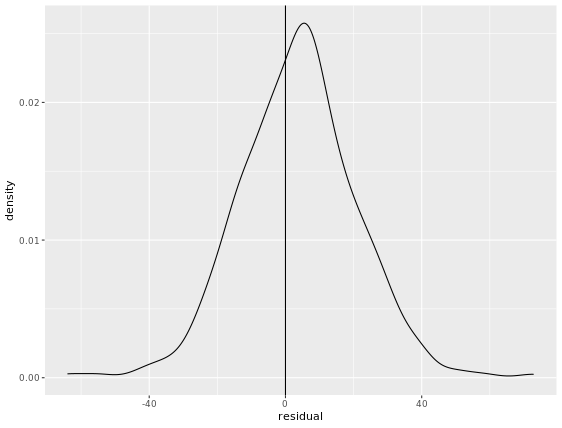

# Random Forest: modeling


In [41]:
%%R

# track_data_to_model_tbl has been pre-defined
track_data_to_model_tbl

# Get the timbre columns
feature_colnames <- track_data_to_model_tbl %>%
    colnames() %>%
    str_subset(fixed("timbre"))
# Create the formula for the model
year_formula <- reformulate(termlabels= feature_colnames,
                            response = "year")

# Run the random forest model
random_forest_model <- track_data_to_model_tbl %>%
    ml_random_forest(year_formula)

# Random Forest: prediction


In [42]:
%%R

# Training, testing sets & model are pre-defined
track_data_to_model_tbl
track_data_to_predict_tbl
random_forest_model

# Predict the responses for the testing data
predicted <- ml_predict(
      random_forest_model,
      track_data_to_predict_tbl) %>% pull(prediction)

# Create a response vs. actual dataset
responses <- track_data_to_predict_tbl %>%
      select(year) %>%
      collect() %>%
      mutate(predicted)

In [43]:
%%R
responses

# A tibble: 29 × 2
    year predicted
   <dbl>     <dbl>
 1  1945     1949.
 2  1949     1947.
 3  1937     1939.
 4  1939     1938.
 5  1949     1944.
 6  1949     1944.
 7  1947     1940.
 8  1938     1944.
 9  1935     1939.
10  1960     1946.
# ℹ 19 more rows
# ℹ Use `print(n = ...)` to see more rows


# Random Forest: visualization


In [ ]:
%%R

# both_responses has been pre-defined
both_responses

# Draw a scatterplot of predicted vs. actual
ggplot(both_responses, aes(actual, predicted, color=model)) +
  # Add a smoothed line
  geom_smooth() +
  # Add a line at actual = predicted
  geom_abline(intercept = 0, slope = 1)

# Create a tibble of residuals
residuals <- both_responses %>%
mutate(residual=predicted-actual)

# Draw a density plot of residuals
ggplot(residuals, aes(residual, color=model)) +
    # Add a density curve
    geom_density() +
    # Add a vertical line through zero
    geom_vline(xintercept = 0)

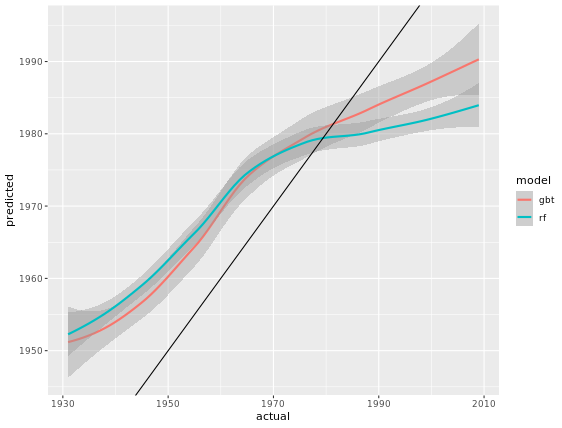

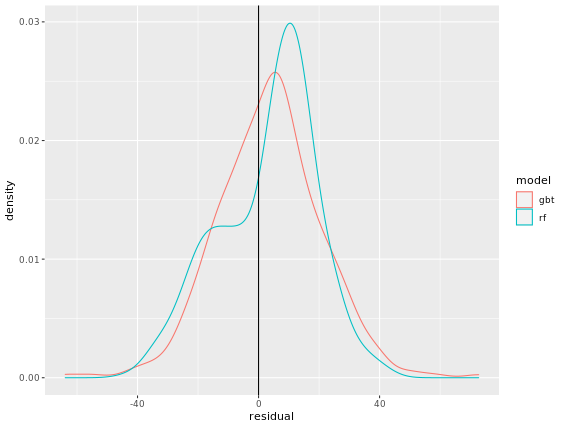

# Comparing model performance
Plotting gives you a nice feel for where the model performs well, and where it doesn't. Sometimes it is nice to have a statistic that gives you a score for the model. This way you can quantify how good a model is, and make comparisons across lots of models. A common statistic is the root mean square error (sometimes abbreviated to "RMSE"), which simply squares the residuals, then takes the mean, then the square root. A small RMSE score for a given dataset implies a better prediction. (By default, you can't compare between different datasets, only different models on the same dataset. Sometimes it is possible to normalize the datasets to provide a comparison between them.)

Here you'll compare the gradient boosted trees and random forest models.

## Instructions

both_responses, containing the predicted and actual year of the track from both models, has been pre-defined as a local tibble.
* Create a sum of squares of residuals dataset.
  * Add a residual column, equal to the predicted response minus the actual response.
  * Group the data by model.
  * Calculate a summary statistic, rmse, equal to the square root of the mean of the residuals squared.

In [ ]:
# both_responses has been pre-defined
both_responses

# Create a residual sum of squares dataset
both_responses %>%
    mutate(residual=predicted-actual) %>%
    group_by(model) %>%
    summarize(rmse =  sqrt(mean(residual^2)))